## 1. Import libraries

In [1]:
! pip install lazypredict

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## 2. Load the data set

In [9]:
df = pd.read_csv('COVID19_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [10]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## 3. Data pre-processing

In [11]:
X.shape

(2622, 881)

In [12]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 *(1 - .8)))
X = selection.fit_transform(X)
X.shape

(2622, 154)

In [13]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## 4. Compare ML algorithm

In [17]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 39954.81it/s]


In [18]:
# Performance table of the training set (80% subset)

predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.94,0.94,0.28,3.60
DecisionTreeRegressor,0.94,0.94,0.28,0.12
ExtraTreeRegressor,0.94,0.94,0.28,0.11
GaussianProcessRegressor,0.94,0.94,0.28,1.38
XGBRegressor,0.91,0.91,0.35,0.64
RandomForestRegressor,0.88,0.89,0.40,2.29
BaggingRegressor,0.86,0.87,0.44,0.38
MLPRegressor,0.83,0.84,0.48,5.11
LGBMRegressor,0.74,0.76,0.59,0.21


In [19]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


## 5. Data visualization of model performance

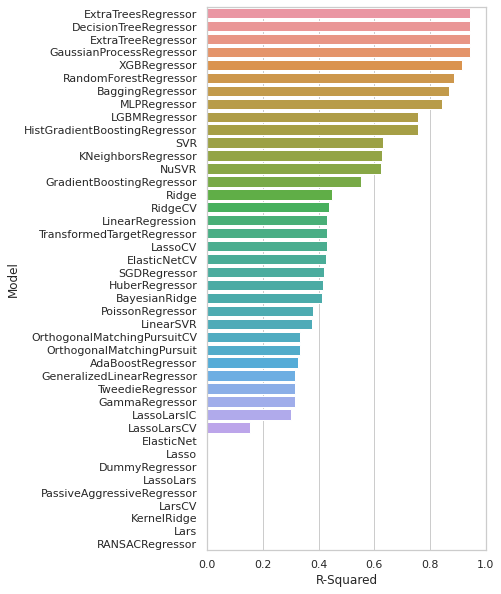

In [28]:
# Bar plot of R-squared values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
plt.savefig('Data visualization of model performance.pdf')

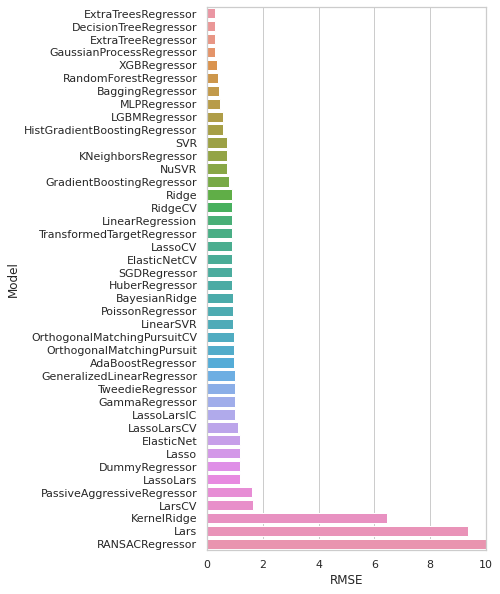

In [27]:
# Bar plot of RMSE values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

plt.savefig('Bar plot of RMSE values.pdf')

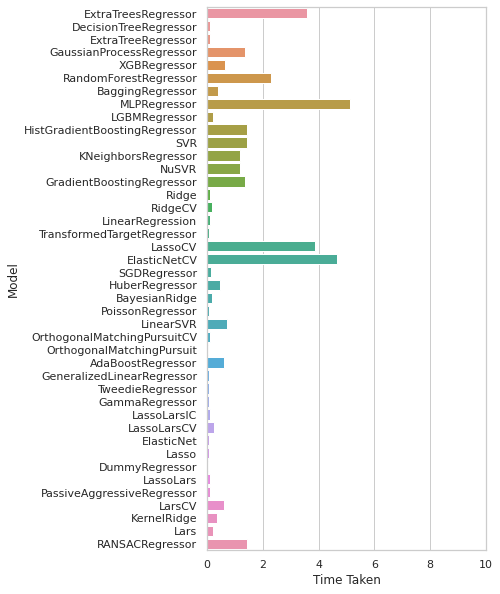

In [26]:
# Bar plot of calculation time

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

plt.savefig('Bar plot of calculation time.pdf')

In [ ]:
! zip -r results.zip . -i *.csv *.pdf